In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
# from evolutionary_search import EvolutionaryAlgorithmSearchCV

In [3]:
file = '..//data//nsduh_selected.csv'
main_data = pd.read_csv(file, sep=',')

In [4]:
x = main_data.drop('RISKGR',axis=1)
y = main_data['RISKGR']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
param_grid = {"n_neighbors": [7,9,11,15,20,50],
             "weights" : ["uniform", "distance"],
              "metric" : ["euclidean", "manhattan", "chebyshev", "minkowski"]
             }

In [7]:
from sklearn.model_selection import GridSearchCV
# knn_model = KNeighborsClassifier()
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=StratifiedKFold(n_splits=5))

In [8]:
gs_result = gs.fit(x_train, y_train)

In [9]:
print(gs_result.best_score_)
print(gs_result.best_estimator_)
print(gs_result.best_params_)
# second level

0.7596019597390399
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='distance')
{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}


In [6]:
knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan', metric_params=None,
                                 n_jobs=None, n_neighbors=50, p=2, weights='distance')

predictions = cross_val_predict(knn_model, x,y, cv=StratifiedKFold(n_splits=10))

In [7]:
score = cross_val_score(knn_model, x, y, scoring='accuracy', cv = StratifiedKFold(n_splits=10))
knn_accuracy = score.mean() * 100

In [8]:
knn_accuracy

76.25102153267929

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
print("KNN accuracy: {}".format(knn_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

KNN accuracy: 76.25102153267929
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22301
           1       0.65      0.73      0.68     19467
           2       0.66      0.51      0.57     14508

   micro avg       0.76      0.76      0.76     56276
   macro avg       0.74      0.73      0.73     56276
weighted avg       0.76      0.76      0.76     56276

[[21420   816    65]
 [ 1604 14131  3732]
 [  276  6872  7360]]


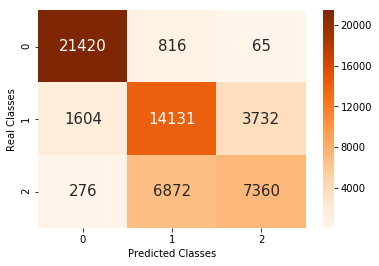

In [11]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Oranges",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('..//images//confusion_knn.jpg', dpi = 300)